In [36]:
import scipy as sci
import mython as my
from random import gauss
import plot_tools as pt
import matplotlib.pyplot as plt
import json
import numpy as np
import compute_ekt as ekt
import dm_tools as dm
from imp import reload
%matplotlib inline
pt.matplotlib_header()
ev = 27.21138386

efermi -0.0101704
Trans. gap 8.74473739368
Optical gap at gamma 8.74473739368


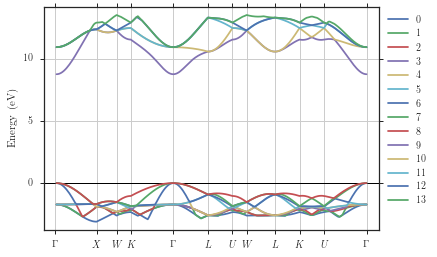

In [37]:
# Reference bandstructures.
reload(ekt)
fig,ax = ekt.plot_bandstructure("hf_solution/fort.25")
ax.grid(True)

In [38]:
reload(ekt)
hf_ekt = ekt.import_hf_data("hf_solution/ekt.vmc.o")
hf_ekt['norb'] = 32
#setzero = abs(hf_ekt['rho']['up']) < 3.0*abs(hf_ekt['rer']['up'])
#hf_ekt['rho']['up'][setzero] = 0.0
#hf_ekt['rer']['up'][setzero] = 0.0
hf_ekt = ekt.compute_spectra(hf_ekt,10)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64] 64
[ -3.60715383e+02+0.j           1.65509623e+02+0.j          -1.26837833e+02+0.j
   6.49845743e+01+0.j          -5.50597678e+01+0.j          -4.37812760e+01+0.j
   4.34638216e+01+0.j          -2.96486677e+01+0.j           3.17845899e+01+0.j
   2.31562669e+01+0.j          -2.05838707e+01+0.j          -1.79632178e+01+0.j
   1.90635490e+01+0.j          -1.78231530e+00+8.37390758j
  -1.78231530e+00-8.37390758j  -1.42811937e+01+0.j
  -1.15783505e+01+0.41205637j  -1.15783505e+01-0.41205637j
  -9.51775030e+00+0.j          -8.26765851e+00+0.19678312j
  -8.26765851e+00-0.19678312j  -4.96016503e+00+0.j          -5.44230981e+00+0.j
   1.40443711e-02+0.j           1.59048756e+01+0.j
   1.38118824e+01+0.438035j     1.38118824e+01-0.438035j
   1.17657589e+01+0.j           1.01916721e+01+0.j
   7.50598410e

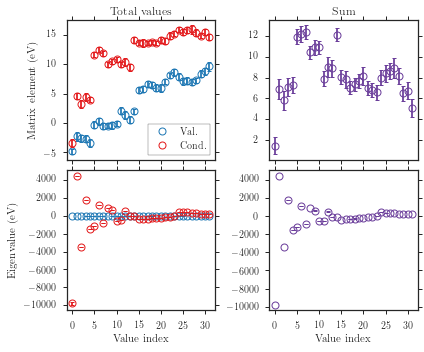

In [43]:
reload(ekt)
fig,ax = ekt.plot_ekt(hf_ekt)
#ax[1,1].set_ylim(-10,5)
fig.tight_layout()
fig.savefig("spectra.pdf")

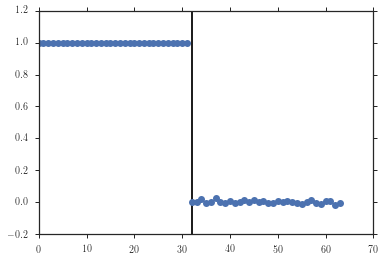

In [40]:
plt.axvline(32,color='k')
plt.plot(hf_ekt['rho']['up'].diagonal(),'o')

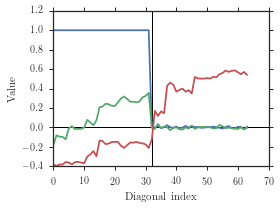

In [41]:
fig,ax = plt.subplots(1,1)
ax.axvline(32,color='k',lw=1)
ax.axhline(0,color='k',lw=1)
ax.plot(hf_ekt['rho']['up'].diagonal(),label='$rho$')
ax.plot(hf_ekt['val']['up'].diagonal(),label='valence')
ax.plot(hf_ekt['con']['up'].diagonal(),label='conduction')
ax.set_xlabel("Diagonal index")
ax.set_ylabel("Value")
fig.set_size_inches(4,3)
fig.tight_layout()
fig.savefig("simpler.eps")